## SQL Data cleaning and Analysis

Import Necessary Libraries

In [24]:
import pandas as pd 
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data into Tables

Load Data set and read first one

In [2]:
conn = sqlite3.connect('Data/im.db')
df1=pd.read_sql('Select * from movie_basics', conn)
df1



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Load second data set and only take the number of votes greater than 25 because this can cause the rating to be skewed if only a few people had voted for it

In [3]:
df2=pd.read_sql('Select * from movie_ratings Where numvotes>25', conn)
df2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1043726,4.2,50352
3,tt1069246,6.2,326
4,tt1094666,7.0,1613
...,...,...,...
45752,tt9633108,3.9,44
45753,tt9668598,5.5,317
45754,tt9690762,5.6,37
45755,tt9768966,8.6,27


Load third and fourth data sets 

In [4]:
df3=pd.read_sql('Select * from directors', conn)
df3

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [5]:
df4=pd.read_sql('Select * from writers', conn)
df4

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


Join tables to get necessary values

In [6]:
df=pd.read_sql('Select movie_basics.movie_id,movie_basics.primary_title,movie_basics.original_title,movie_basics.start_year,movie_basics.runtime_minutes,movie_basics.genres,movie_ratings.averagerating,movie_ratings.numvotes from movie_basics join movie_ratings Using(movie_id) Where numvotes>100 AND runtime_minutes<400 Order By numvotes', conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1311083,Rat Scratch Fever,Rat Scratch Fever,2011,90.0,"Horror,Sci-Fi",4.9,101
1,tt1547089,A Yakuza's Daughter Never Cries,Doch yakudzy,2010,81.0,Comedy,5.1,101
2,tt1652295,Alien Inhabitant,Alien Inhabitant,2011,90.0,"Crime,Drama,Fantasy",4.4,101
3,tt1698653,"Me & Mr Jones, a love story on Natalee-island",Me and Mr Jones on Natalee-Island,2011,88.0,"Crime,Drama,Mystery",3.5,101
4,tt1711475,The Jade and the Pearl,Fei cui ming zhu,2010,104.0,"Comedy,Romance",4.2,101
...,...,...,...,...,...,...,...,...
27866,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
27867,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
27868,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
27869,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769


Create another df to get just the directors and how well the directors movies did

In [7]:
#df_directors=pd.read_sql('Select DISTINCT directors.movie_id,directors.person_id as director_id,movie_basics.primary_title,movie_basics.original_title,movie_basics.start_year,movie_basics.runtime_minutes,movie_basics.genres,movie_ratings.averagerating,movie_ratings.numvotes from movie_basics join movie_ratings Using(movie_id) join directors Using(movie_id) Where numvotes>100 AND runtime_minutes<400 Order By numvotes', conn)
#df_directors
df_directors=pd.read_sql('Select DISTINCT directors.movie_id,directors.person_id as director_id,AVG(movie_ratings.averagerating) as avg_rating from movie_ratings join directors Using(movie_id) Where numvotes>100 Group By director_id Order By numvotes', conn)
df_directors

,movie_id,director_id,avg_rating
0,tt2980728,nm0053331,7.300000
1,tt2317089,nm0072159,7.100000
2,tt2980728,nm0110557,7.300000
3,tt6115392,nm0134112,5.250000
4,tt1711475,nm0150929,5.400000
...,...,...,...
21278,tt1431045,nm1783265,8.000000
21279,tt2015381,nm0348181,6.266667
21280,tt1130884,nm0000217,7.642857
21281,tt0848228,nm0923736,7.455556


# Clean Data/Data manipulation and deal with Null values

Change float value to an int

In [9]:

df_directors['avg_rating']=df_directors.avg_rating.astype(int)
df_directors

,movie_id,director_id,avg_rating
0,tt2980728,nm0053331,7
1,tt2317089,nm0072159,7
2,tt2980728,nm0110557,7
3,tt6115392,nm0134112,5
4,tt1711475,nm0150929,5
...,...,...,...
21278,tt1431045,nm1783265,8
21279,tt2015381,nm0348181,6
21280,tt1130884,nm0000217,7
21281,tt0848228,nm0923736,7


Create a duplicate table for directors

In [10]:
temp=pd.DataFrame()
temp['director_id']=df_directors['director_id']
temp['rating']=df_directors['avg_rating']

Check to see if any values are Null

In [56]:
df.isna().any()

movie_id           False
primary_title      False
original_title     False
start_year         False
runtime_minutes    False
genres              True
averagerating      False
numvotes           False
dtype: bool

Check to see what percent of the values are null to understand how to handle missing data

In [13]:
len(df[df.runtime_minutes.isna()])/ len(df)
len(df[df.genres.isna()])/ len(df)

0.0

Fill null in genres tables and check again

In [14]:
df['genres'] = df['genres'].fillna(value='None')
df['original_title'] = df['original_title'].fillna(value=df['primary_title'])
df.isna().any()

movie_id           False
primary_title      False
original_title     False
start_year         False
runtime_minutes    False
genres             False
averagerating      False
numvotes           False
dtype: bool

Other checks on data 

In [15]:

df["genres"].value_counts()
df["original_title"].value_counts()
df["primary_title"].value_counts()
df["runtime_minutes"].value_counts()

90.0     1824
100.0     995
95.0      933
85.0      824
93.0      745
         ... 
272.0       1
184.0       1
29.0        1
42.0        1
226.0       1
Name: runtime_minutes, Length: 198, dtype: int64

Check directors for null

In [16]:

df_directors.isna().any()

movie_id       False
director_id    False
avg_rating     False
dtype: bool

Manipulate genres into boolean values and create a column for each Genre, in order to do this we must put genres into an array

In [17]:
g=[]
j=[]
count=0
for i in df['genres']:
    j=i.split(',')
    g.append(j)
df['genres']=g

Next put the values into the new columns within the dataframe

In [20]:
genres_list=['Documentary', 'Drama','Comedy','Horror','Thriller','Action','Bigoraphy','Romance' ,'Music','History','Family','Sport','Animation','Crime','Sci-Fi','War','Mystery','Western']

for gl in genres_list:
    g2=[]
    for g3 in df['genres']:
        if gl in g3:
            g2.append(True)
        else:
            g2.append(False)
    df[gl]=g2


Check table


In [21]:
df_directors

,movie_id,director_id,avg_rating
0,tt2980728,nm0053331,7
1,tt2317089,nm0072159,7
2,tt2980728,nm0110557,7
3,tt6115392,nm0134112,5
4,tt1711475,nm0150929,5
...,...,...,...
21278,tt1431045,nm1783265,8
21279,tt2015381,nm0348181,6
21280,tt1130884,nm0000217,7
21281,tt0848228,nm0923736,7


Create another table for the genres where they are listed multiple times for consistency with csv data analysis

In [ ]:
genre_table=pd.read_sql('Select genres,movie_id from movie_basics', conn)
genre_table['genres'] = genre_table['genres'].fillna(value='None')
g=[]
j=[]
count=0
for i in genre_table['genres']:
    j=i.split(',')
    g.append(j)
genre_table['genres']=g
ids = []
genre = []
vote_averages = []
temp_genres = {'movie_ids': ids, 'genres': genre}

for index, row in genre_table.iterrows():
    for gen in row[0]:
        ids.append(row[1])
        genre.append(gen)
        

genres_frame = pd.DataFrame(temp_genres)
genres_frame

# Visualizations

We have 2 already so now we will make one with directors vs rating

In [28]:
plt.figure(figsize=(15,5))


<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

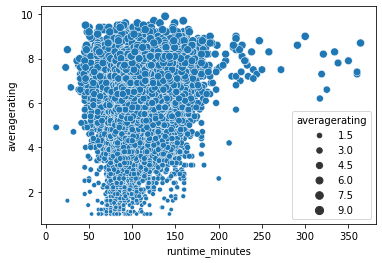

In [27]:
sns.scatterplot(data=df, x='runtime_minutes', y='averagerating',size='averagerating')

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

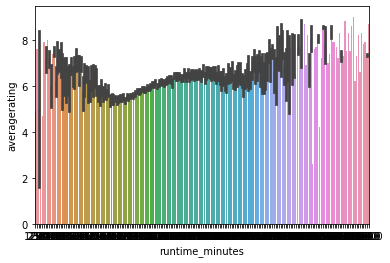

In [26]:
sns.barplot(data=df, x='runtime_minutes' , y='averagerating')

KeyboardInterrupt: 

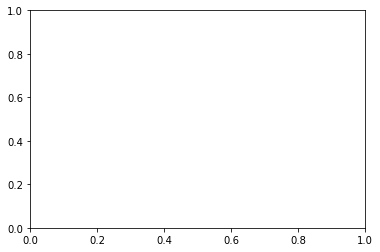

In [29]:
sns.barplot(data=df_directors, x='director_id' , y='avg_rating')

# Analysis Complete

Close connection

In [ ]:
#conn.close()